
<img src="https://bloqueneon.uniandes.edu.co/content/enforced/248650-202410_ISIS4219_01/Laboratorios.png" ><br>
# Machine Learning Techniques - ISIS4219

Primer Semestre - 2024




## Integrantes

*   Carlos Raúl de la Rosa Peredo
*   Jhon Stewar Rayo Mosquera



## **Problema**

*Las enfermedades cardiovasculares son la principal causa de muerte en el mundo, y se calcula que cobran 17,9 millones de vidas al año (OMS). La enfermedad de las arterias coronarias es el tipo más común de enfermedad cardíaca y se produce debido a las obstrucciones (placa) desarrolladas en el interior de las arterias coronarias (vasos sanguíneos que alimentan los músculos del corazón). Los cardiólogos utilizan diversas técnicas de imagen y mediciones invasivas de la presión arterial para examinar y controlar la gravedad de dichas obstrucciones.* <br>
*Los factores de riesgo conductuales más importantes de estas enfermedades son una dieta poco saludable, la inactividad física, el consumo de tabaco y el uso nocivo del alcohol. Los efectos de los factores de riesgo pueden manifestarse en las personas en forma de aumento de la presión arterial, aumento de la glucosa en sangre, aumento de los lípidos en sangre y sobrepeso y obesidad.
Identificar a las personas con mayor riesgo de sufrir enfermedades cardiovasculares y garantizar que reciban el tratamiento adecuado puede evitar muertes prematuras. Con este objetivo en mente, se quiere utilizar las técnicas de machine learning para construir un modelo que permita predecir qué pacientes pueden estar en riesgo de padecer este tipo de cardiopatía.<br><br>
Referencias.* <br>



*OMS (s.f.). “Cardiovascular diseases”. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1*
<br><br>
_**Fuente de Datos**: https://www.kaggle.com/agsam23/coronary-artery-disease/version/3_


## **1. Importación de librerias y datos**

Instalamos las librerias requeridas para el desarrollo del taller.

In [1]:
!pip install -U pandas
!pip install -U ydata-profiling
!pip install -U scikit-learn
!pip install -U sklearn_features
!pip install -U matplotlib
!pip install -U kaggle

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Descargamos el dataset del banco de datos Kaggle.

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! mkdir content && cd content
! kaggle datasets download agsam23/coronary-artery-disease
! unzip coronary-artery-disease.zip

mkdir: no se puede crear el directorio «/home/raul/.kaggle»: El archivo ya existe
mkdir: no se puede crear el directorio «content»: El archivo ya existe
  0%|                                               | 0.00/13.7k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 13.7k/13.7k [00:00<00:00, 4.17MB/s]
Archive:  coronary-artery-disease.zip
  inflating: Coronary_artery.csv     
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Importamos las librerias requeridas para el desarrollo del taller

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tqdm import tqdm

/home/raul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## **2. Procesamiento y entendimiento de los datos.**

*Explore el conjunto de datos proporcionado y prepárelos para el entrenamiento y validación. Dado que este conjunto de datos no incluye un grupo de test, es necesario realizar una división entre entrenamiento y test. Utilice la función train_test_split de sklearn.model_selection para llevar a cabo esta tarea.*

*¿Que particularidades presentan los datos y qué técnicas de preprocesamiento se pueden aplicar?*



Primero leemos los datos y visualizamos que se hayan cargado correctamente

In [4]:
data = pd.read_csv('./content/Coronary_artery.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,Male,Typical Angina,145,233,True,Left ventricular hypertrophy,150,No,2.3,Downsloping,0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,Left ventricular hypertrophy,108,Yes,1.5,Flat,3,Normal,2
2,67,Male,Asymptomatic,120,229,False,Left ventricular hypertrophy,129,Yes,2.6,Flat,2,Reversible defect,1
3,37,Male,Nonanginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Normal,0
4,41,Female,Atypical Angina,130,204,False,Left ventricular hypertrophy,172,No,1.4,Unsloping,0,Normal,0


Ahora presentamos el diccionario de los datos. <br><br>


**Edad (age)**: La edad es un factor de riesgo importante en enfermedades del corazón. Las personas mayores tienen un mayor riesgo de enfermedad de las arterias coronarias. La edad se encuentra en años.

**Sexo (sex)**: El riesgo de enfermedad coronaria puede variar entre hombres y mujeres. Por lo general, los hombres tienen un mayor riesgo, especialmente a una edad más joven.

**Tipo de Dolor Pectoral (cp)**: Los diferentes tipos de dolor pectoral pueden indicar diferentes niveles de riesgo para enfermedades del corazón.

**Presión arterial sistólica en reposo (trestbps)**: Valores elevados pueden indicar hipertensión, que es un factor conocido para la enfermedad de las arterias coronarias.

**Colesterol Sérico (chol)**: Niveles altos de colesterol en la sangre son un factor de riesgo significativo para enfermedades del corazón.

**Azúcar en Sangre en Ayunas (fbs)**: Un nivel de glucosa en sangre en ayunas superior a 120 mg/dL puede indicar diabetes, lo cual es un factor de riesgo para la enfermedad de las arterias coronarias.

**Resultados Electrográficos en Reposo (restecg)**: Las anomalías en un electrocardiograma en reposo pueden indicar problemas cardíacos subyacentes.

**Frecuencia Cardíaca Máxima Alcanzada (thalach)**: Una menor frecuencia cardíaca máxima durante el ejercicio puede indicar un mayor riesgo de enfermedad del corazón.

**Pico de Depresión del ST inducido por el ejercicio relativo al reposo (oldpeak)**: La depresión del segmento ST puede indicar isquemia miocárdica, un signo de enfermedad coronaria.

**Angina Inducida por Ejercicio (exang)**: La presencia de angina durante el ejercicio es un signo clínico significativo de enfermedad coronaria.

**Número de Vasos Principales (ca)**: Un número mayor de vasos sanguíneos principales visibles durante la fluoroscopia puede estar asociado con un menor riesgo, pero esto depende del contexto del paciente.

**Pendiente del Segmento ST del Ejercicio (slope)**: La pendiente del segmento ST post-ejercicio puede proporcionar información sobre la función cardíaca.

**Tipo de Defecto (thal)**: El tipo de defecto cardíaco, detectado por pruebas de esfuerzo como la talio, puede ser un fuerte predictor de enfermedad coronaria.

Hacemos un exploratory data analysys (EDA) usando metodos del data frame cargado en memoria.

In [5]:
data.info()

# Observamos que no hay datos faltantes en el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    object 
 2   cp        297 non-null    object 
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    bool   
 6   restecg   297 non-null    object 
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    object 
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    object 
 11  ca        297 non-null    int64  
 12  thal      297 non-null    object 
 13  class     297 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 30.6+ KB


In [6]:
data.describe()

# Observamos una buena distribucion de los datos en la mayoria de caracteristicas presentes

,age,trestbps,chol,thalach,oldpeak,ca,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768,0.946128
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965,1.234551
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
# Disinguimos entre variables calificativas y cuantitativas
var_cate = ['sex','cp','fbs','restecg','exang','slope','thal', 'class']
var_conti = ['age','trestbps','chol','thalach','oldpeak','ca']

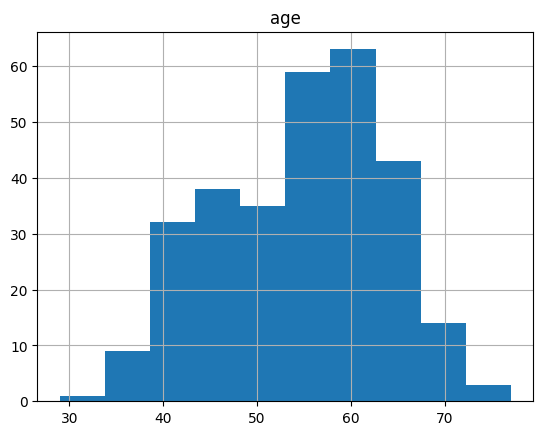

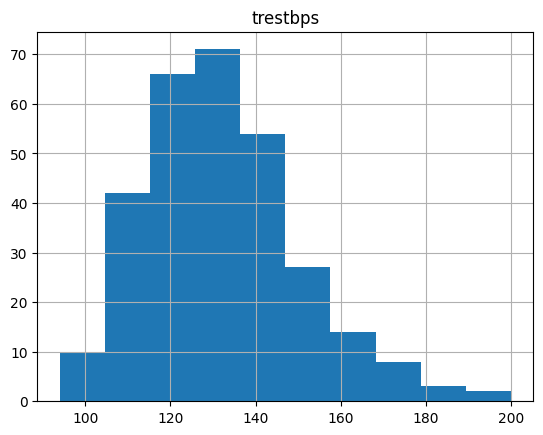

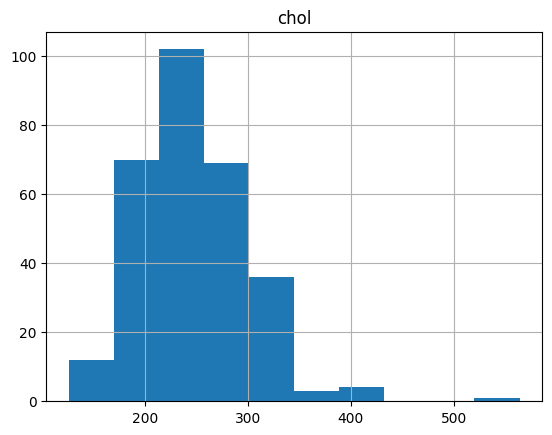

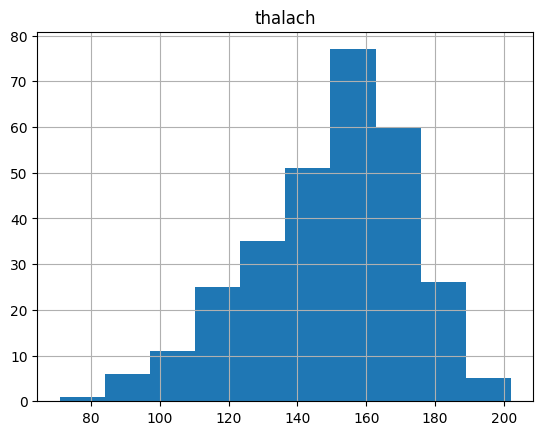

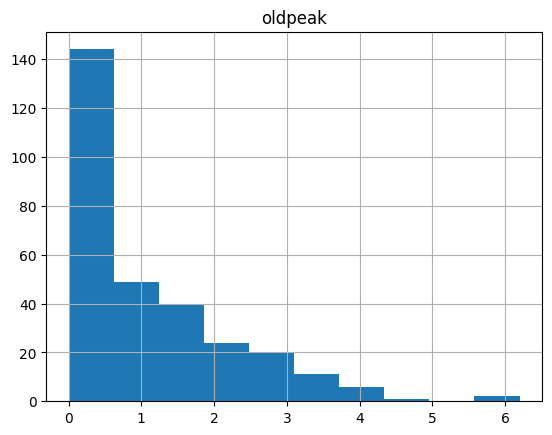

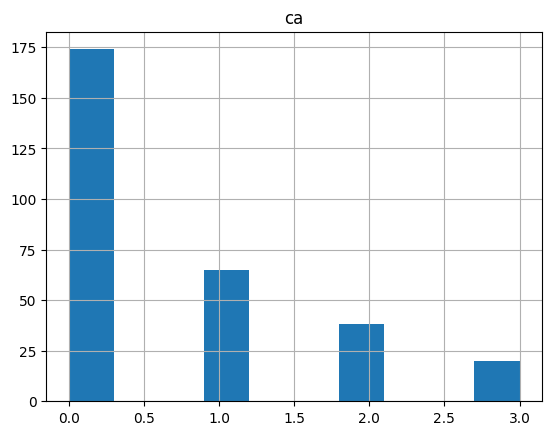

In [8]:
for col in var_conti:
    plt.title(col)
    data[col].hist()
    plt.show()

# La distribución en las variables cuantitativas se ve consistente,
# aunque sí parecen haber casos de posibles valores atípicos, no se considerarán
# cómo outliers pues posiblemente corresponden a un persona muy enferma y no a un
# error de captura

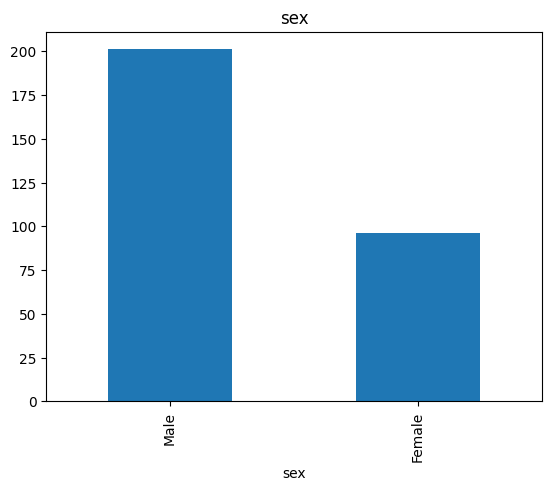

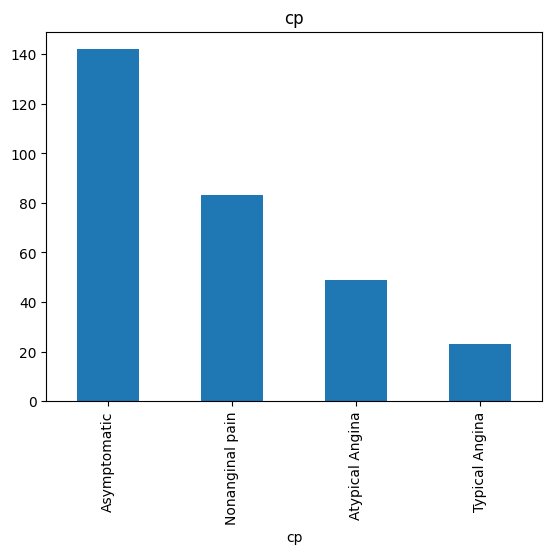

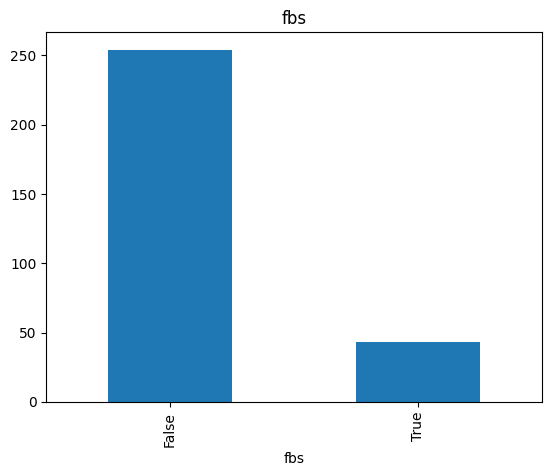

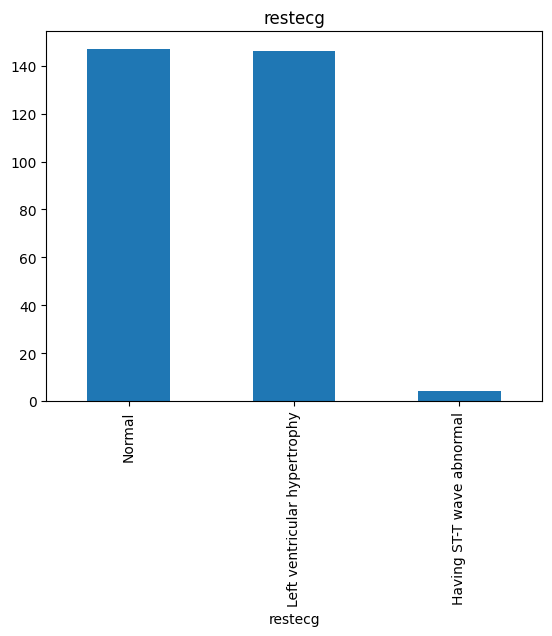

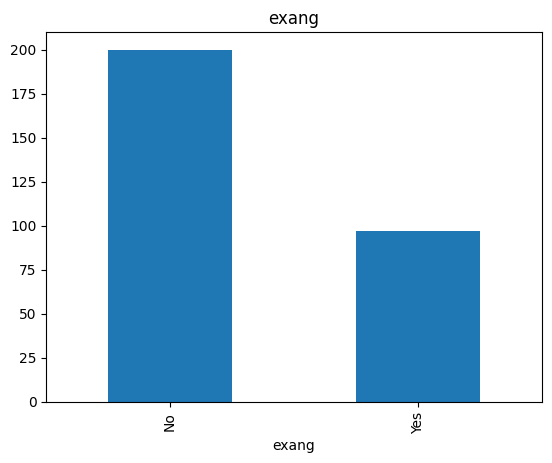

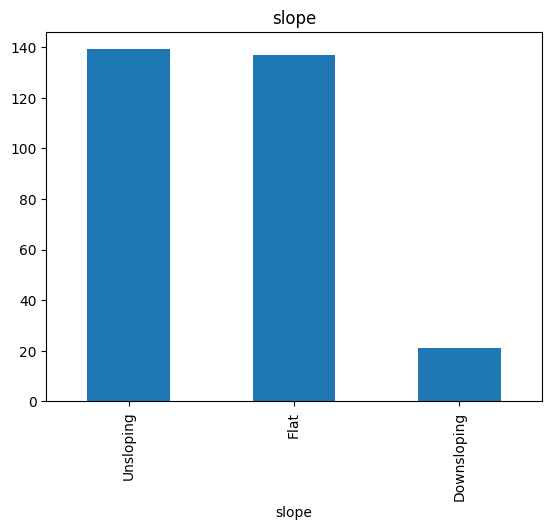

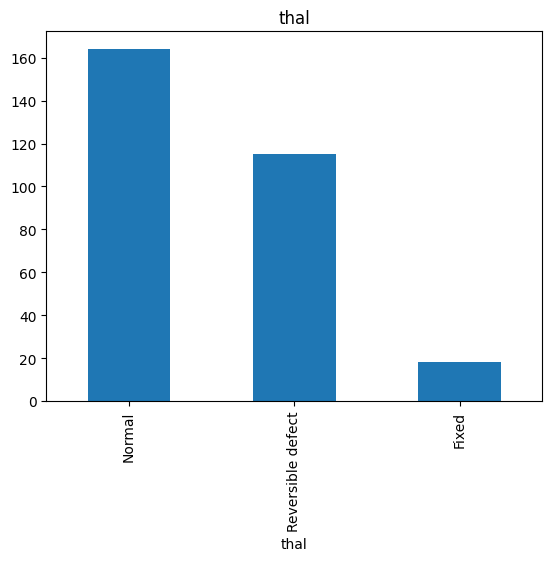

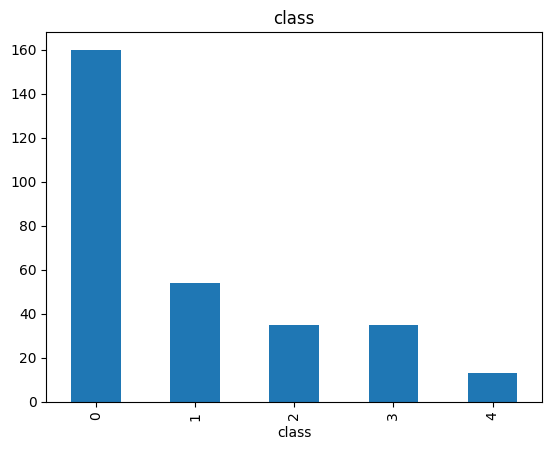

In [9]:
for col in var_cate:
    data[col].value_counts().plot(kind='bar', title=col)
    plt.show()

# Observamos que varias caracteristicas no estan bien distribuidas. Por ejemplo,
# hay casi el doble de hombres que mujeres en el conjunto de datos.
# Igualmente la clase objetivo `class` presenta una distribucion desbalanceada.
# Con el fin de generar un modelo practico a partir de estos datos, se trabajará un
# problema de clasificación binario en el que si existe algún riesgo (1-2-3-4) por leve
# que sea, se clasificara como propenso a enfermedades cardiovasculares. Esto permitira a los expertos
# tomar las mejores decisiones con ayuda del modelo.

Ahora que la clase objetivo sera trabajada como un problema binario, creamos otra variable `risk` a partir de la variable `class`


In [10]:
# "class" es la variable objetivo, donde 0 indica una persona sin riesgo y 1-4 el nivel de riesgo donde 4
# significa una alta probabilidad de padecer una enfermedad cardiovascular. Como se explico, trabajermos un problema
# de clasificacion binaria con la nueva variable risk

data['risk'] = [0 if i<1 else 1 for i in data['class']]
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,risk
0,63,Male,Typical Angina,145,233,True,Left ventricular hypertrophy,150,No,2.3,Downsloping,0,Fixed,0,0
1,67,Male,Asymptomatic,160,286,False,Left ventricular hypertrophy,108,Yes,1.5,Flat,3,Normal,2,1
2,67,Male,Asymptomatic,120,229,False,Left ventricular hypertrophy,129,Yes,2.6,Flat,2,Reversible defect,1,1
3,37,Male,Nonanginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Normal,0,0
4,41,Female,Atypical Angina,130,204,False,Left ventricular hypertrophy,172,No,1.4,Unsloping,0,Normal,0,0


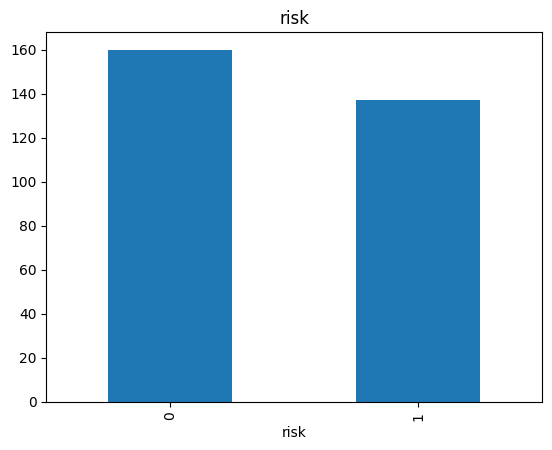

In [11]:
data['risk'].value_counts().plot(kind='bar', title='risk')
plt.show()

# Observamos una mejor distribucion en esta ocasion para la variable objetivo risk

Ahora hacemos un exploratory data analysys (EDA) usando la libreria PandasProfiling para comparar los resultados previamente obtenidos. <br>
Observamos que nuestro analasis y conclusiones iniciales son correctas.

In [12]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Ahora procedemos mirar el nivel de correlación en las variables del dataset para ver si podemos trabajar con menos caracteristicas, o también observar si existe alguna relación entre alguna variable y el hecho de estar en riesgo de padecer una enfermedad cardiovascular.

In [13]:
# Del mapa de correlación se ve que no existe una correlación suficientemente alta
# entre las varibles. Sin embargo, resulta de relevante destacar que para la variable
# objetivo se tienen algunos valores cercanos a un umbral de significancia en la
# correlación (>0.5 ó -0.5<). A continuación se destacan algunos que podrían ser
# indicadores relevantes de acuerdo a la teoría:

# Relación inversamente proporcional en thalach => mientras menor sea, mayor riesgo
# Relación proporcional en oldpeak
# Relación proporcional en ca
# Relación proporcional en thal_Reversible defect
# Relación proporcional en exang_Yes


# Esto se volverá a hacer en el preprocesamiento
df_cate_dummies = pd.get_dummies(data[var_cate])
df4corr = pd.concat([data[var_conti], df_cate_dummies], axis=1)
# Quitar dummies de variables binarias
df4corr.drop(columns=['sex_Female','exang_No'], inplace=True)

corr_map = df4corr.corr()

corr_map.style.background_gradient(cmap='coolwarm')#.set_precision(2)

,age,trestbps,chol,thalach,oldpeak,ca,fbs,class,sex_Male,cp_Asymptomatic,cp_Atypical Angina,cp_Nonanginal pain,cp_Typical Angina,restecg_Having ST-T wave abnormal,restecg_Left ventricular hypertrophy,restecg_Normal,exang_Yes,slope_Downsloping,slope_Flat,slope_Unsloping,thal_Fixed,thal_Normal,thal_Reversible defect
age,1.000000,0.290476,0.202644,-0.394563,0.197123,0.362210,0.132062,0.222156,-0.092399,0.137297,-0.163227,-0.043181,0.042571,0.083519,0.139295,-0.158538,0.096489,0.025612,0.171004,-0.183998,0.059732,-0.130333,0.103792
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243,0.097954,0.180860,0.159620,-0.066340,0.029082,-0.080820,-0.054825,0.149921,0.058025,0.141565,-0.154929,0.066691,0.121060,0.025511,-0.087677,0.075211,-0.143474,0.109624
chol,0.202644,0.131536,1.000000,-0.000075,0.038596,0.115945,0.012708,0.066448,-0.198089,0.064831,-0.017678,-0.023570,-0.057040,0.032412,0.160217,-0.167674,0.059339,-0.051456,0.041510,-0.015037,-0.099575,0.001379,0.047368
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640,-0.268727,-0.007842,-0.420639,-0.060496,-0.377920,0.256120,0.160943,0.080420,-0.121669,-0.057784,0.085830,-0.384368,-0.056541,-0.423817,0.452458,-0.160679,0.286684,-0.213956
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000,0.294452,0.008311,0.501461,0.106567,0.271036,-0.283033,-0.117376,0.083559,0.167555,0.093657,-0.132278,0.289310,0.393024,0.312656,-0.514262,0.101819,-0.347874,0.305253
ca,0.362210,0.097954,0.115945,-0.268727,0.294452,1.000000,0.152086,0.521178,0.091925,0.272522,-0.156403,-0.137452,-0.061355,0.040290,0.123522,-0.132799,0.148232,-0.030998,0.167764,-0.151679,0.087585,-0.259966,0.222484
fbs,0.132062,0.180860,0.012708,-0.007842,0.008311,0.152086,1.000000,0.049040,0.038850,-0.087329,-0.053990,0.106259,0.059785,-0.048074,0.073918,-0.062827,-0.000893,0.110477,-0.054418,-0.002389,0.096002,-0.072045,0.026522
class,0.222156,0.159620,0.066448,-0.420639,0.501461,0.521178,0.049040,1.000000,0.226797,0.484832,-0.238184,-0.277180,-0.109985,0.123610,0.168667,-0.197149,0.391613,0.118633,0.341863,-0.402480,0.102698,-0.511833,0.472201
sex_Male,-0.092399,-0.066340,-0.198089,-0.060496,0.106567,0.091925,0.038850,0.226797,1.000000,0.085014,-0.041925,-0.115054,0.092497,-0.106613,0.045963,-0.021380,0.143581,0.050211,-0.010357,-0.015447,0.145368,-0.390730,0.327671
cp_Asymptomatic,0.137297,0.029082,0.064831,-0.377920,0.271036,0.272522,-0.087329,0.484832,0.085014,1.000000,-0.425452,-0.596088,-0.277311,0.063596,0.110496,-0.125148,0.454514,0.025233,0.223083,-0.235832,0.095876,-0.344442,0.304661


## **3.  Limpieza y preparación de datos**

*Realizar el proceso de limpieza de datos con el fin de asegurar que los datos estén libres de errores, valores nulos, valores atípicos y formatos inconsistentes.*

Empezamos separando los datos en un grupo `X_train` para entrenar el modelo y otro `X_test` para probar el modelo generado. Tambien separamos la variable predictora `y_train` y `y_test` que corresponde a la variable `risk`

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['risk', 'class']),
                                                    data['risk'], test_size=0.3,
                                                    random_state=42)
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,61,Male,Asymptomatic,140,207,False,Left ventricular hypertrophy,138,Yes,1.9,Unsloping,1,Reversible defect
37,57,Male,Asymptomatic,150,276,False,Left ventricular hypertrophy,112,Yes,0.6,Flat,1,Fixed
16,48,Male,Atypical Angina,110,229,False,Normal,168,No,1.0,Downsloping,0,Reversible defect
253,67,Female,Asymptomatic,106,223,False,Normal,142,No,0.3,Unsloping,2,Normal
144,47,Male,Nonanginal pain,108,243,False,Normal,152,No,0.0,Unsloping,0,Normal


Procedemos a transformar los datos y crear el pipeline correspondiente para su procesamiento. <br>
Dado que el algoritmo solo entiende valores numericos, debemos transformar las variables cualitativas en variables cuantitativas por cada valor posible que tomen.

In [15]:
def create_dummies(df):
    """Esta función toma un DataFrame y realiza la codificación de variables categóricas
    mediante el método de one-hot encoding, luego concatena estas variables codificadas
    con las variables continuas originales del DataFrame.

    Args:
        df (pandas DataFrame): DataFrame que contiene las variables categóricas y continuas.

    Returns:
        pandas DataFrame: DataFrame con las variables categóricas codificadas mediante
        one-hot encoding y las variables continuas originales.
    """    
    # Convertir la variable fbs a tipo entero
    df['fbs'] = df.fbs.astype(int)

    # Realizar la codificación de variables categóricas
    df_cate_dummies = pd.get_dummies(df[var_cate])

    # Concatenar variables continuas y variables categóricas codificadas
    df_dummies = pd.concat([df[var_conti], df_cate_dummies], axis=1)

    # Eliminar columnas no deseadas
    df_dummies.drop(columns=['sex_Female','exang_No'], inplace=True)

    return df_dummies


In [16]:
if 'class' in var_cate:
  var_cate.remove('class')

In [17]:
COLUMNS = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'fbs',
           'sex_Male', 'cp_Asymptomatic', 'cp_Atypical Angina',
           'cp_Nonanginal pain', 'cp_Typical Angina',
           'restecg_Having ST-T wave abnormal',
           'restecg_Left ventricular hypertrophy', 'restecg_Normal', 'exang_Yes',
           'slope_Downsloping', 'slope_Flat', 'slope_Unsloping', 'thal_Fixed',
           'thal_Normal', 'thal_Reversible defect']

In [18]:
qualitative_transformer = FunctionTransformer(create_dummies)

# Estandarizar solo las variables cuantitativas
quantitive_transformer = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), var_conti)
    ],
    remainder='passthrough'
)

# Crear el pipeline completo
pipe = Pipeline(steps=[
    ('qualitive_transformer', qualitative_transformer),
    ('quantitive_transformer', quantitive_transformer),
])
pipe

Pipeline(steps=[('qualitive_transformer',
                 FunctionTransformer(func=<function create_dummies at 0x7f5590c2ae60>)),
                ('quantitive_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak',
                                                   'ca'])]))])

In [19]:
X_mod = pipe.fit_transform(X_train)
data_mod = pd.DataFrame(X_mod)
data_mod.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.72856,0.500301,-0.786293,-0.442406,0.787175,0.298941,0,True,True,False,...,False,True,False,True,False,False,True,False,False,True
1,0.28303,1.086392,0.503842,-1.555556,-0.370992,0.298941,0,True,True,False,...,False,True,False,True,False,True,False,True,False,False
2,-0.719412,-1.257973,-0.374946,0.841998,-0.014633,-0.732405,0,True,False,True,...,False,False,True,False,True,False,False,False,False,True
3,1.396855,-1.492409,-0.487131,-0.271152,-0.638262,1.330286,0,False,True,False,...,False,False,True,False,False,False,True,False,True,False
4,-0.830795,-1.375191,-0.113179,0.156983,-0.905531,-0.732405,0,True,False,False,...,False,False,True,False,False,False,True,False,True,False


Creamos otro pipeline para comparar el modelo generado.

In [20]:
qualitative_transformer = FunctionTransformer(create_dummies)

# Estandarizar solo las variables cuantitativas
quantitive_transformer = ColumnTransformer(
    transformers=[
        ('polynomial_features', PolynomialFeatures(2), var_conti),
        ('minmax_scaler', MinMaxScaler(), var_conti),
    ],
    remainder='passthrough'
)

# Crear el pipeline completo
pipe2 = Pipeline(steps=[
    ('qualitive_transformer', qualitative_transformer),
    ('quantitive_transformer', quantitive_transformer)
])
pipe2

Pipeline(steps=[('qualitive_transformer',
                 FunctionTransformer(func=<function create_dummies at 0x7f5590c2ae60>)),
                ('quantitive_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('polynomial_features',
                                                  PolynomialFeatures(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak',
                                                   'ca']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak',
                                                   'ca'])]))])

In [21]:
X_mod = pipe2.fit_transform(X_train)
data_mod = pd.DataFrame(X_mod)
data_mod.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,61.0,140.0,207.0,138.0,1.9,1.0,3721.0,8540.0,12627.0,...,False,True,False,True,False,False,True,False,False,True
1,1.0,57.0,150.0,276.0,112.0,0.6,1.0,3249.0,8550.0,15732.0,...,False,True,False,True,False,True,False,True,False,False
2,1.0,48.0,110.0,229.0,168.0,1.0,0.0,2304.0,5280.0,10992.0,...,False,False,True,False,True,False,False,False,False,True
3,1.0,67.0,106.0,223.0,142.0,0.3,2.0,4489.0,7102.0,14941.0,...,False,False,True,False,False,False,True,False,True,False
4,1.0,47.0,108.0,243.0,152.0,0.0,0.0,2209.0,5076.0,11421.0,...,False,False,True,False,False,False,True,False,True,False


## **4. Modelamiento**

*El proceso de modelado se refiere a la etapa en la que se construyen y entrenan modelos de machine learning para realizar predicciones o tomar decisiones basadas en datos. En este paso es importante realizar la Selección de Hiperparámetros con el fin de optimizar el modelo.*

Creamos el pipeline para el modelo usando regresion logistica

In [22]:
# De acuerdo a la validación liblinear es ideal para conjuntos de datos pequeños

estimators = [('preprocessing', pipe),
              ('clf',LogisticRegression(solver='liblinear', penalty='l2')),
              ]
model = Pipeline(estimators)
model

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('qualitive_transformer',
                                  FunctionTransformer(func=<function create_dummies at 0x7f5590c2ae60>)),
                                 ('quantitive_transformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('std_scaler',
                                                                   StandardScaler(),
                                                                   ['age',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                                                                    'ca'])]))])),
                ('clf', LogisticRegression(solver='liblinear'))])

Entrenamos el modelo

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('qualitive_transformer',
                                  FunctionTransformer(func=<function create_dummies at 0x7f5590c2ae60>)),
                                 ('quantitive_transformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('std_scaler',
                                                                   StandardScaler(),
                                                                   ['age',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                                                                    'ca'])]))])),
                ('clf', LogisticRegression(solver='liblinear'))])

Preparamos un segundo pipeline para comparar.



In [24]:
# De acuerdo a la validación liblinear es ideal para conjuntos de datos pequeños

estimators = [('preprocessing', pipe2),
              ('clf',LogisticRegression(solver='liblinear', penalty='l2')),
              ]
model2 = Pipeline(estimators)
model2

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('qualitive_transformer',
                                  FunctionTransformer(func=<function create_dummies at 0x7f5590c2ae60>)),
                                 ('quantitive_transformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('polynomial_features',
                                                                   PolynomialFeatures(),
                                                                   ['age',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                                                                    'ca']),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler(),
                                                                   ['age',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                                                                    'ca'])]))])),
                ('clf', LogisticRegression(solver='liblinear'))])

Entrenamos el segundo modelo

In [25]:
model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('qualitive_transformer',
                                  FunctionTransformer(func=<function create_dummies at 0x7f5590c2ae60>)),
                                 ('quantitive_transformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('polynomial_features',
                                                                   PolynomialFeatures(),
                                                                   ['age',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                                                                    'ca']),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler(),
                                                                   ['age',
                                                                    'trestbps',
                                                                    'chol',
                                                                    'thalach',
                                                                    'oldpeak',
                                                                    'ca'])]))])),
                ('clf', LogisticRegression(solver='liblinear'))])

## **5. Predicción**

*Una vez realizado el entrenamiento del modelo es necesario realizar una predicción con los datos de prueba, que servira como insumo para la evaluación y/o validación de la calidad del modelo.*

Empezamos usando el modelo para predicir la variable objetivo a partir de los datos de entrenamiento.

In [26]:
print('------------------- Modelo 1 -------------------')
pred1 = model.predict(X_train)
print(pred1)
print('\n------------------- Modelo 2 -------------------')
pred2 = model2.predict(X_train)
print(pred2)

------------------- Modelo 1 -------------------
[1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]

------------------- Modelo 2 -------------------
[1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0]


Ahora construimos una matriz de confusion para el desempeno de los modelos.

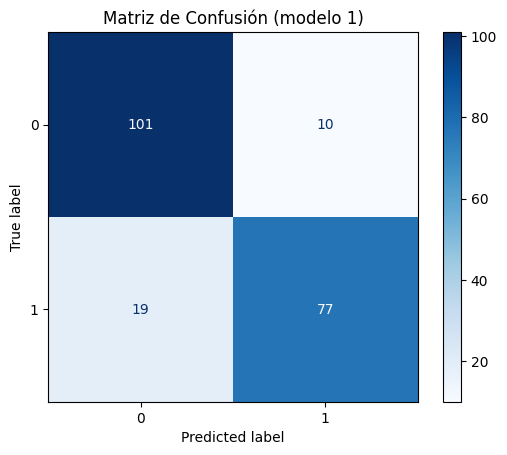

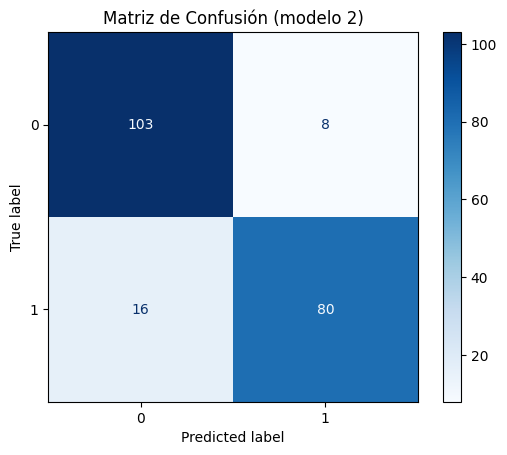

In [27]:
conf_matrix = confusion_matrix(y_train, pred1)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues', values_format='d')
# Añade etiquetas y muestra el gráfico
plt.title('Matriz de Confusión (modelo 1)')
plt.show()


conf_matrix2 = confusion_matrix(y_train, pred2)
disp = ConfusionMatrixDisplay(conf_matrix2)
disp.plot(cmap='Blues', values_format='d')
# Añade etiquetas y muestra el gráfico
plt.title('Matriz de Confusión (modelo 2)')
plt.show()

Ahora calculamos las metricas de precision, recall y f1.

In [28]:
print('----------Reporte para el Modelo 1----------')
print(classification_report(y_train,pred1,target_names=['no risk', 'risk']))
print('----------Reporte para el Modelo 2----------')
print(classification_report(y_train,pred2,target_names=['no risk', 'risk']))

----------Reporte para el Modelo 1----------
              precision    recall  f1-score   support

     no risk       0.84      0.91      0.87       111
        risk       0.89      0.80      0.84        96

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

----------Reporte para el Modelo 2----------
              precision    recall  f1-score   support

     no risk       0.87      0.93      0.90       111
        risk       0.91      0.83      0.87        96

    accuracy                           0.88       207
   macro avg       0.89      0.88      0.88       207
weighted avg       0.89      0.88      0.88       207



Observamos que ambos modelos tienen muy buenos resultados en todas las metricas para el conjunto de datos de entrenamiento por lo que el error de entrenamiento es bajo. Ahora procedemos a probar que tan bien se generaliza el modelo.

In [29]:
print('------------------- Modelo 1 -------------------')
pred1 = model.predict(X_test)
print(pred1)

print('\n------------------- Modelo 2 -------------------')
pred2 = model2.predict(X_test)
print(pred2)

------------------- Modelo 1 -------------------
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1]

------------------- Modelo 2 -------------------
[0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1]


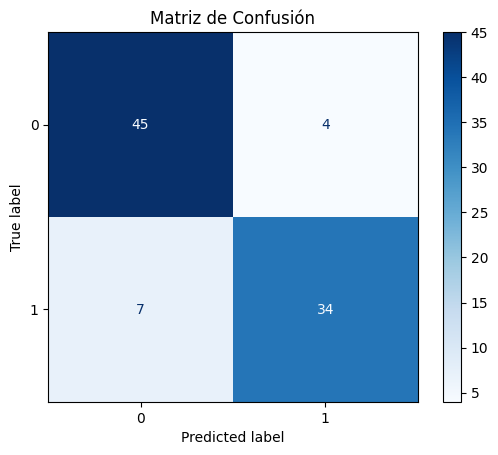

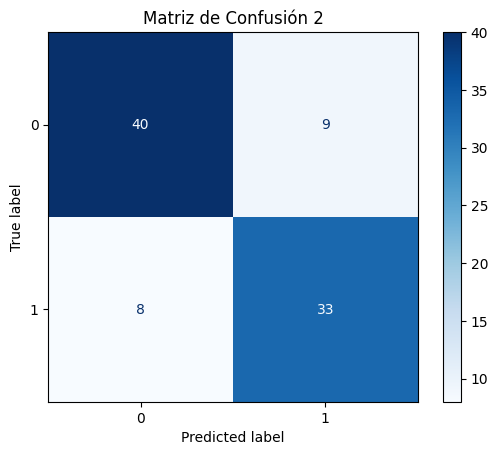

In [30]:
conf_matrix = confusion_matrix(y_test, pred1)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues', values_format='d')
# Añade etiquetas y muestra el gráfico
plt.title('Matriz de Confusión')
plt.show()


conf_matrix2 = confusion_matrix(y_test, pred2)
disp = ConfusionMatrixDisplay(conf_matrix2)
disp.plot(cmap='Blues', values_format='d')
# Añade etiquetas y muestra el gráfico
plt.title('Matriz de Confusión 2')
plt.show()

In [31]:
print('----------Reporte para el Modelo 1----------')
print(classification_report(y_test,pred1,target_names=['no risk', 'risk']))
print('----------Reporte para el Modelo 2----------')
print(classification_report(y_test,pred2,target_names=['no risk', 'risk']))

----------Reporte para el Modelo 1----------
              precision    recall  f1-score   support

     no risk       0.87      0.92      0.89        49
        risk       0.89      0.83      0.86        41

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90

----------Reporte para el Modelo 2----------
              precision    recall  f1-score   support

     no risk       0.83      0.82      0.82        49
        risk       0.79      0.80      0.80        41

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



Como se puede observar el modelo dos tiene un peor rendimiento en todas las metricas, por lo que en este caso los datos se pueden representar relativamente bien a partir de una funcion lineal, en lugar de un polinomio.

Ahora vamos a validar los datos con conjuntos distintos de entrenamiento y prueba


In [33]:
N = 100
enf_precision = []
sano_recall = []
c = 0

while True:

    try:

        X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['risk','class']),
                                                            data['risk'], test_size=0.3,
                                                            )

        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)

        res = classification_report(y_test, y_pred, target_names=['no risk', 'risk'], output_dict=True)

        enf_precision.append(res['risk']['precision'])
        sano_recall.append(res['no risk']['recall'])

        c += 1

        if c == N:
            break

    except ValueError as e:

        continue


print("promedio risk precission: ", np.mean(enf_precision))
print("std risk precission: ", np.std(enf_precision))

print("\n------------------\n")

print("promedio no risk recall: ", np.mean(sano_recall))
print("std no risk recall: ", np.std(sano_recall))

promedio risk precission:  0.854944927991651
std risk precission:  0.05529144953348005

------------------

promedio no risk recall:  0.8815807105285074
std no risk recall:  0.0419651695132943


## **6. Conclusión**

Considerando que el objetivo del modelo prioriza una correcta y pronta identificación de personas en riesgo de sufrir enfermedades cardíacas:

* Se logró un recall en la clase "no risk" de 0.88 ± 0.04. Esta métrica es de gran interés, ya que buscamos minimizar al máximo los falsos positivos, es decir, asignar un bajo riesgo a personas de alto riesgo.

* Complementariamente, se alcanzó una precisión del 0.85 ± 0.05 al identificar a personas de alto riesgo.

Estos resultados podrían mejorar si se considerase una probabilidad más alta cómo umbral de selección.